In [0]:
## helper.py

import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [0]:
#!pip3 install torch torchvision

import torch

from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

from torch import optim

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'rectina'

import matplotlib.pyplot as plt

#To normalize the data
transform = transforms.Compose([transforms.ToTensor(),
 transforms.Normalize((0.5,), (0.5,))
])

#Downloading and setting up the datas
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform) 

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

  0%|          | 16384/9912422 [00:00<01:30, 109114.21it/s]

9920512it [00:00, 10463662.46it/s]                            


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 447701.39it/s]
0it [00:00, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 5386073.88it/s]                           
8192it [00:00, 181164.92it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [30]:
#Building the model
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))

#defining loss params
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.05)

loss_rate = []
accuracy_rate = []

epochs = 30
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    images = images.view(images.shape[0],-1)
    
    optimizer.zero_grad()
    
    output = model.forward(images)
    loss = criterion(output, labels)
    
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
  else:
    print(f"Training Loss: {running_loss/len(trainloader)}")
    loss_rate.append((running_loss/len(trainloader))*100)


# imshow(images[0,:])
# print(labels[0].numpy())

Training Loss: 0.5049112087278478
Training Loss: 0.23092555106957074
Training Loss: 0.16754861377965985
Training Loss: 0.13189998046278573
Training Loss: 0.10978832650683455
Training Loss: 0.09403612004664502
Training Loss: 0.08196834408874705
Training Loss: 0.0730023964234729
Training Loss: 0.0659729631861914
Training Loss: 0.05899488088413716
Training Loss: 0.05305508650722169
Training Loss: 0.0477084008969867
Training Loss: 0.04353496190637096
Training Loss: 0.040399201574853494
Training Loss: 0.0367885114237128
Training Loss: 0.03379464752817981
Training Loss: 0.030064287228022776
Training Loss: 0.029411691118469602
Training Loss: 0.025016201145972795
Training Loss: 0.02288222108797075
Training Loss: 0.021269835148273266
Training Loss: 0.01990705198015837
Training Loss: 0.017175384893093004
Training Loss: 0.016181903589026148
Training Loss: 0.016083339271392535
Training Loss: 0.013558750173533961
Training Loss: 0.01164810860962128
Training Loss: 0.009949113966704821
Training Loss: 

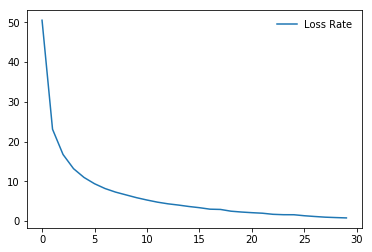

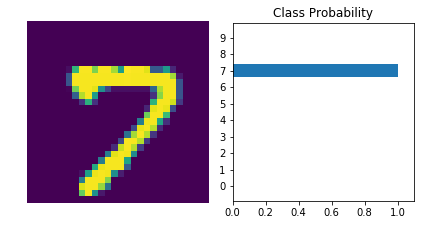

In [34]:
images, label = next(iter(trainloader))

img = images[0].view(1,784)

with torch.no_grad():
  logps = model.forward(img)

ps = torch.exp(logps)

plt.plot(loss_rate,label="Loss Rate")
# plt.plot(accuracy_rate,label="Accuracy Rate")
plt.legend(frameon=False)

view_classify(img.view(1,28,28), ps)